# Lab 1. Real time crawling of tweets from Twitter and creating a network of user mentions

### Step 1: Install and import tweepy library

In [23]:
import os
import tweepy as tw
import pandas as pd

### Step 2: Sign up your twitter developer account and obtain the following credentials (https://developer.twitter.com/en)¶

In [24]:
consumer_key= "7yLjajg6lLMMe2bbbEF6Ktfc2"
consumer_secret= 'UJh95nM6mDd5gXeWykSavgpC0Wa26C1KxQQooocJwL9EA3dpYs'
access_token= '1552133988893962240-DanT0Dh3x9Hfd5siFhR9JeCAecUrpq'
access_token_secret= 'GvnDbnQlMA6VCX20yQHgOiqUuFc4KQpQmLsXEMplMlVlh'

### Step 3: Using the above credentials get yourself authorized to stream real time tweets using the code snippet below

In [25]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth,wait_on_rate_limit=True)

In [26]:
MY_BEARER_TOKEN = "AAAAAAAAAAAAAAAAAAAAAHgYfQEAAAAAf81mN3BgkfJemyfBH0PudataXdE%3DKv43FsPh9Z0K9zpay5qcoED9Jq1ys3OC7FckYHKKpcXXtHwbMX"

# create your client
client = tw.Client(bearer_token=MY_BEARER_TOKEN)

In [29]:
# query to search for tweets
query = "#Thunivu"


# get tweets from the API
tweets = client.search_recent_tweets(query=query,
                                     tweet_fields = ["created_at", "text", "source"],
                                     user_fields = ["name", "username", "location", "verified", "description"],
                                     max_results = 10,
                                     expansions='author_id'
                                     )

In [30]:
tweets

Response(data=[<Tweet id=1587655646371274752 text='RT @ONLINE_DAFC: #AjithKumar #Thunivu 🥵💯\n\nhttps://t.co/nGEybRYzLH'>, <Tweet id=1587655644878082049 text='RT @AFC__Dindigul: Man of humbleness ❤️ #AjithKumar !!\n\nGood Morning Ak Devotees ❤️\u200d🔥\n\n#Thunivu #ThunivuPongal https://t.co/wsvRNolpMb'>, <Tweet id=1587655644718706688 text='RT @iamdines19: Where is Endhiran movie.. Not in the list 🧐🧐🧐top 50 list la ilaya🧐\n\nSo comscore is also fake? \n\n#Thunivu #ThunivuPongal #Aj…'>, <Tweet id=1587655640125964288 text='RT @HVinothDirector: King arrived very very  soon 🔥🔥\n#ThunivuPongal\n#Thunivu'>, <Tweet id=1587655639782019072 text='RT @iam_Prabastark: He is the hero and he is the villain ‼️ \n\n#ThunivuPongal #Thunivu #Ajithkumar https://t.co/9VwmbyJwdT'>, <Tweet id=1587655637248638976 text='RT @BLSTG: Only way for #Thunivu to beat #Varisu in Overseas :\n\n#Thunivu needs to get highly positive WOM and #Varisu to get disaster WOM..…'>, <Tweet id=1587655623067549696 text='RT @ThalaFan

### Step 4: Using the API object search tweets of your interest using a particular hashtag

In [31]:
import pandas as pd
# create a list of records
tweet_info_ls = []
# iterate over each tweet and corresponding user details
for tweet, user in zip(tweets.data, tweets.includes['users']):
    tweet_info = {
        'created_at': tweet.created_at,
        'text': tweet.text,
        'source': tweet.source,
        'name': user.name,
        'username': user.username,
        'location': user.location,
        'verified': user.verified,
        'description': user.description
    }
    tweet_info_ls.append(tweet_info)
# create dataframe from the extracted records
tweets_df = pd.DataFrame(tweet_info_ls)
# display the dataframe
tweets_df.head()

,created_at,text,source,name,username,location,verified,description
0,2022-11-02 03:59:37+00:00,RT @ONLINE_DAFC: #AjithKumar #Thunivu 🥵💯\n\nht...,Twitter for Android,𝘉𝘏ム𝘙ム𝘛𝘏,iam_aj_ironman,Miss U Appa 💔,False,🅱🅴🄻🄸🄴🅅🄴 🄸🄽 🆈🅾🆄🅁🅂🄴🄻🄵 \n ♦️ eɴɴαм pol v...
1,2022-11-02 03:59:37+00:00,RT @AFC__Dindigul: Man of humbleness ❤️ #Ajith...,Twitter for Android,கார்த்திக்,Karthik_off01,"Dindigul, India",False,"To grow everyday, learn everyday."
2,2022-11-02 03:59:37+00:00,RT @iamdines19: Where is Endhiran movie.. Not ...,Twitter Web App,கடல்தானை🤴𓃵,Murali_speaks,None,False,Old accnt @murali_unoffl\n#என்றும்_தலஅஜித்\n#க...
3,2022-11-02 03:59:36+00:00,RT @HVinothDirector: King arrived very very s...,Twitter for Android,𝐌𝐚𝐫𝐢𝐚♪,itz_MariaAK92,None,False,
4,2022-11-02 03:59:36+00:00,RT @iam_Prabastark: He is the hero and he is t...,Twitter for Android,S Naveen kumar Thala ajith,naveen_thank,None,False,I like reading Rajesh Kumar novel


### Step 6: Import the networkx package

In [32]:
import networkx as nx

### Step 7: First create a basic network with few nodes and edges

In [33]:
G= nx.Graph()
G.add_nodes_from(["A","B"])
G.add_edge('A',"B")
G.nodes()

NodeView(('A', 'B'))

In [34]:
G.nodes['A']['Age']=21
G.nodes['B']['Age']=22
G.edges['A','B']['Friendship']= '2019/04/21'

In [35]:
G.nodes(data=True)

NodeDataView({'A': {'Age': 21}, 'B': {'Age': 22}})

In [36]:
G.add_edge(1, 2)
G.edges()

EdgeView([('A', 'B'), (1, 2)])

In [37]:
G.edges(data= True)

EdgeDataView([('A', 'B', {'Friendship': '2019/04/21'}), (1, 2, {})])

In [38]:
eg=[(1,2),(1,3),(1,4),(1,5),(1,6)]
H=nx.Graph(eg)

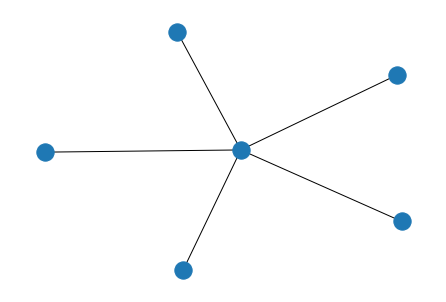

In [39]:
nx.draw(H)